In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(['Cabin','Ticket','Name','PassengerId','Fare'], axis =1, inplace = True)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S

In [5]:
df.Age.fillna(df.Age.median(),inplace = True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [7]:
df.dropna(inplace = True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [9]:
df = pd.get_dummies(df,columns=['Sex','Embarked',"Pclass"],drop_first=True)
df.head()

Survived   Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
0         0  22.0      1      0         1           0           1         0   
1         1  38.0      1      0         0           0           0         0   
2         1  26.0      0      0         0           0           1         0   
3         1  35.0      1      0         0           0           1         0   
4         0  35.0      0      0         1           0           1         0   

   Pclass_3  
0         1  
1         0  
2         1  
3         0  
4         1

In [10]:
df

Survived   Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
0           0  22.0      1      0         1           0           1         0   
1           1  38.0      1      0         0           0           0         0   
2           1  26.0      0      0         0           0           1         0   
3           1  35.0      1      0         0           0           1         0   
4           0  35.0      0      0         1           0           1         0   
..        ...   ...    ...    ...       ...         ...         ...       ...   
886         0  27.0      0      0         1           0           1         1   
887         1  19.0      0      0         0           0           1         0   
888         0  28.0      1      2         0           0           1         0   
889         1  26.0      0      0         1           0           0         0   
890         0  32.0      0      0         1           1           0         0   

     Pclass_3  
0           1  
1           0  
2           1  
3           0  
4           1  
..        ...  
886         0  
887         0  
888         1  
889         0  
890         1  

[889 rows x 9 columns]

In [11]:
from sklearn.svm import SVC
x= df.drop('Survived', axis = 1)
y = df['Survived']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
model = SVC(kernel= 'rbf')

In [13]:
model.fit(x_train,y_train)

SVC()

In [14]:
model.score(x_test,y_test)

0.5692883895131086

In [15]:
df_test = pd.read_csv("test.csv")

In [16]:
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
df_test.drop(['Cabin','Ticket','Name','PassengerId','Fare'], axis =1, inplace = True)
df_test.head()

Pclass     Sex   Age  SibSp  Parch Embarked
0       3    male  34.5      0      0        Q
1       3  female  47.0      1      0        S
2       2    male  62.0      0      0        Q
3       3    male  27.0      0      0        S
4       3  female  22.0      1      1        S

In [19]:
df_test = pd.get_dummies(df_test,columns=['Sex','Embarked',"Pclass"],drop_first=True)
df_test.head()

Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0  34.5      0      0         1           1           0         0         1
1  47.0      1      0         0           0           1         0         1
2  62.0      0      0         1           1           0         1         0
3  27.0      0      0         1           0           1         0         1
4  22.0      1      1         0           0           1         0         1

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         332 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Sex_male    418 non-null    uint8  
 4   Embarked_Q  418 non-null    uint8  
 5   Embarked_S  418 non-null    uint8  
 6   Pclass_2    418 non-null    uint8  
 7   Pclass_3    418 non-null    uint8  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 12.0 KB


In [21]:
df_test.Age.fillna(df.Age.median(),inplace = True)


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Sex_male    418 non-null    uint8  
 4   Embarked_Q  418 non-null    uint8  
 5   Embarked_S  418 non-null    uint8  
 6   Pclass_2    418 non-null    uint8  
 7   Pclass_3    418 non-null    uint8  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 12.0 KB


In [23]:
x_prediction  = df_test

In [24]:
y_prediction = model.predict(x_prediction)

In [25]:
prediction = pd.DataFrame(y_prediction,columns = ["Prection_rbf"])
prediction.head()

Prection_rbf
0             0
1             0
2             0
3             0
4             0

In [26]:
from sklearn.model_selection import GridSearchCV


In [27]:
clf = GridSearchCV(SVC(kernel = 'rbf'),{
    'C' : np.arange(1,50,2),
    'gamma' : np.arange(1,50,4)
}, cv =5 ,return_train_score=False)

In [28]:
clf.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'gamma': array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49])})

In [29]:
cdf  = pd.DataFrame(clf.cv_results_)
cdf.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.014368      0.005644         0.009422        0.005747       1   
1       0.016377      0.000613         0.009656        0.007898       1   

  param_gamma                params  split0_test_score  split1_test_score  \
0           1  {'C': 1, 'gamma': 1}              0.736              0.752   
1           5  {'C': 1, 'gamma': 5}              0.680              0.688   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.814516           0.750000           0.774194         0.765342   
1           0.709677           0.669355           0.725806         0.694568   

   std_test_score  rank_test_score  
0        0.027462               25  
1        0.020470               50

In [30]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [31]:
cdf[["param_C","param_gamma","mean_test_score"]]

param_C param_gamma  mean_test_score
0         1           1         0.765342
1         1           5         0.694568
2         1           9         0.694568
3         1          13         0.694568
4         1          17         0.694568
..      ...         ...              ...
320      49          33         0.694568
321      49          37         0.694568
322      49          41         0.694568
323      49          45         0.694568
324      49          49         0.694568

[325 rows x 3 columns]

In [32]:
clf.best_score_

0.7701677419354838

In [33]:
cdf[cdf['rank_test_score'] == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
13       0.012933      0.006518         0.006411        0.007854       3   

   param_gamma                params  split0_test_score  split1_test_score  \
13           1  {'C': 3, 'gamma': 1}              0.736               0.76   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
13           0.774194               0.75           0.830645         0.770168   

    std_test_score  rank_test_score  
13        0.032715                1

In [34]:
clf.best_params_

{'C': 3, 'gamma': 1}

In [35]:
# now analysis using kernel 'LINEAR'
model2 = SVC(kernel = 'linear')

In [36]:
model2.fit(x_train,y_train)

SVC(kernel='linear')

In [37]:
model2.score(x_test,y_test)

0.7677902621722846

In [38]:
clf2 = GridSearchCV(SVC(kernel = 'linear'),{ "C" : np.arange(1,50,2)}, cv = 5 ,return_train_score= False)

In [39]:
clf2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [40]:
ldf = pd.DataFrame(clf2.cv_results_)
ldf.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.130117      0.095338         0.009773        0.007993       1   
1       0.244868      0.170474         0.006521        0.007995       3   

     params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 1}                0.8              0.808           0.790323   
1  {'C': 3}                0.8              0.808           0.790323   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.774194           0.790323         0.792568        0.011323   
1           0.774194           0.790323         0.792568        0.011323   

   rank_test_score  
0                1  
1                1

In [41]:
dir(clf2)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [42]:
clf2.best_score_

0.792567741935484

In [43]:
clf2.best_params_

{'C': 1}

In [44]:
model2 = SVC(kernel = 'linear', C = 1)
model2.fit(x,y)

SVC(C=1, kernel='linear')

In [45]:
y_prediction = model2.predict(x_prediction)
prediction_linear = pd.DataFrame(y_prediction)
prediction_linear.to_csv("ME19B190_PREDICTIONS_LINEAR", index = False)

In [46]:
prediction.to_csv("ME19B190_predictions_rbf", index = False) 

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
vis  = pd.read_csv("train.csv")

In [49]:
vis.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [50]:
 vis.Age.fillna(df.Age.median(), inplace = True)


In [51]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
vis.drop("Cabin", inplace = True, axis = 1)

In [53]:
vis.dropna(inplace  = True)

In [54]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


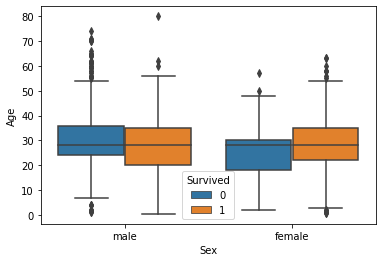

In [55]:
sns.boxplot(x = 'Sex', y ="Age", hue = "Survived", data = vis)
plt.savefig("Boxplot.jpg")

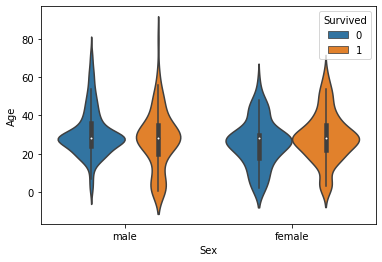

In [56]:
sns.violinplot(x = 'Sex', y ="Age", hue = "Survived", data = vis)
plt.savefig("Violinplot.jpg")

D:\myfolder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


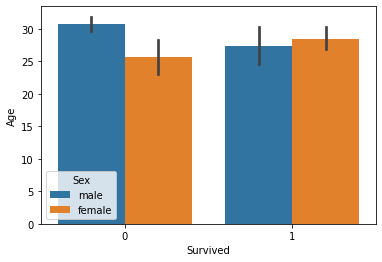

In [57]:
sns.barplot(vis.Survived, vis.Age, hue = vis.Sex)
plt.savefig("Barplot.jpg")